In [5]:
import os
import pickle
import joblib
import pandas as pd
import numpy as np
import random
import itertools


In [75]:
basins = ['libby_reservoir_inflow',  'owyhee_r_bl_owyhee_dam',  'san_joaquin_river_millerton_reservoir',  'taylor_park_reservoir_inflow',
 'boise_r_nr_boise', 'green_r_bl_howard_a_hanson_dam', 'weber_r_nr_oakley', 'detroit_lake_inflow', 'virgin_r_at_virtin', 'dillon_reservoir_inflow',
 'pueblo_reservoir_inflow', 'hungry_horse_reservoir_inflow', 'stehekin_r_at_stehekin', 'pecos_r_nr_pecos', 'snake_r_nr_heise', 'yampa_r_nr_maybell',
 'colville_r_at_kettle_falls', 'missouri_r_at_toston', 'merced_river_yosemite_at_pohono_bridge', 'animas_r_at_durango','fontenelle_reservoir_inflow', 'boysen_reservoir_inflow']

selected_years = range(2000,2024,2)


base_dir = "/data/Hydra_Work/Scaled_Data"

dataframes = ['static_variables']

# Function to load DataFrames
def load_dataframes(base_dir, names):
    loaded_dfs = {}
    for name in names:
        file_path = os.path.join(base_dir, f"{name}.pkl")
        locals()[name] = pd.read_pickle(file_path)
    return locals()
saved_dfs = load_dataframes(base_dir, dataframes)

for name in dataframes:
    locals()[name] = saved_dfs[name]


In [81]:
columns_to_keep = [
    'aet_mm_uyr',
    'swc_pc_uyr',
    'pet_mm_uyr',
    'wet_pc_ug1',
    'wet_pc_ug2',
    'hft_ix_u09',
    'lkv_mc_usu',
    'ari_ix_uav',
    'riv_tc_usu',
    'sgr_dk_sav',
    'snw_pc_uyr',
    'cmi_ix_uyr',
    'slt_pc_uav',
    'cly_pc_uav',
    'inu_pc_ult',
    
]


cluster_representatives = [
    "glc_pc_u04",
    "tmp_dc_uyr",
    "glc_pc_u13",
    "inu_pc_ult",
    "glc_pc_u14",
    "wet_pc_ug1",
    "slp_dg_sav",
    "dor_pc_pva",
    "lka_pc_sse",
    "snw_pc_uyr",
    "cmi_ix_uyr",
    "glc_pc_u12",
    "prm_pc_sse"
]

new_static_variables = static_variables[columns_to_keep]

In [20]:
Hydro_basins = pd.read_csv('/data/Hydra_Work/Rodeo_Data/hydrobasins_summary.csv')
Hydro_basins.set_index('site_id', inplace = True)
Hydro_basins


columns_to_drop = [col for col in Hydro_basins.columns if pd.api.types.is_integer_dtype(Hydro_basins[col]) or Hydro_basins[col].isnull().any()]

# Drop the identified columns
df_cleaned = Hydro_basins.drop(columns=columns_to_drop)

# Drop non-numeric columns
df_cleaned = df_cleaned.select_dtypes(include=[float])
df_cleaned = df_cleaned.loc[:, (df_cleaned != df_cleaned.iloc[0]).any()]

# Fill any remaining NaNs with column mean (if any)
df_cleaned = df_cleaned.apply(lambda col: col.fillna(col.mean()), axis=0)


columns_to_keep = [col for col in df_cleaned.columns if 'glc_pc_s' not in col]
df_cleaned = df_cleaned[columns_to_keep]

df_cleaned

,inu_pc_smn,inu_pc_smx,inu_pc_slt,inu_pc_umn,inu_pc_umx,inu_pc_ult,lka_pc_sse,lka_pc_use,dor_pc_pva,slp_dg_sav,...,gwt_cm_sav,dis_m3_pyr,dis_m3_pmn,dis_m3_pmx,ria_ha_ssu,ria_ha_usu,riv_tc_ssu,riv_tc_usu,pop_ct_ssu,pop_ct_usu
site_id,,,,,,,,,,,,,,,,,,,,,
american_river_folsom_lake,1.281250,1.843750,5.500000,1.343750,1.625000,5.218750,13.718750,9.250000,346.000000,143.656250,...,578.406250,335.924002,83.972000,692.218009,934.603996,6108.565036,6934.862082,3.331849e+04,10.783000,31.567000
animas_r_at_durango,1.090909,1.090909,1.272727,0.090909,0.090909,0.545455,1.545455,0.636364,30.363636,190.000000,...,697.818182,51.204001,2.011000,231.818998,309.283000,1044.450004,2121.038965,5.929426e+03,20.650001,28.002999
boise_r_nr_boise,0.320755,0.320755,1.641509,0.037736,0.037736,2.226415,8.226415,1.773585,218.905660,163.528302,...,731.528302,243.195999,51.992000,684.001997,1094.041007,7355.933018,6563.113008,3.520557e+04,10.817000,20.035000
boysen_reservoir_inflow,3.611465,3.611465,6.464968,0.312102,0.312102,2.910828,27.974522,5.426752,61.343949,56.216561,...,523.070064,779.238000,243.311001,2263.518003,2737.020000,34212.005883,14637.675970,1.590700e+05,40.099000,478.464004
colville_r_at_kettle_falls,1.300000,1.300000,1.900000,0.750000,0.750000,1.550000,4.500000,8.950000,0.000000,99.500000,...,561.350000,66.713000,24.932000,166.092001,358.647999,1371.226992,1477.918010,4.925006e+03,21.952000,80.033000
detroit_lake_inflow,0.375000,0.375000,1.875000,0.125000,0.125000,2.500000,21.875000,5.375000,0.000000,156.625000,...,609.750000,121.861001,26.203000,228.863005,308.506004,780.300983,1760.370026,4.047160e+03,0.450000,0.969000
dillon_reservoir_inflow,0.200000,0.200000,2.800000,0.000000,0.000000,2.000000,15.600000,9.800000,0.000000,158.200000,...,640.200000,5.323000,1.420000,20.632000,90.978000,119.128999,247.803999,2.987450e+02,17.693000,24.905000
fontenelle_reservoir_inflow,0.666667,0.666667,4.395062,0.037037,0.037037,1.012346,8.395062,8.469136,78.172840,59.481481,...,410.209877,715.999000,322.819001,1530.499999,1906.945000,19989.813004,12016.033010,9.978236e+04,10.835000,136.083001
green_r_bl_howard_a_hanson_dam,17.000000,36.000000,59.750000,32.500000,60.000000,83.000000,4.750000,1.250000,53.250000,179.750000,...,650.000000,60.418000,14.240000,111.918999,158.850998,374.431995,856.583992,1.819382e+03,0.007000,0.023000


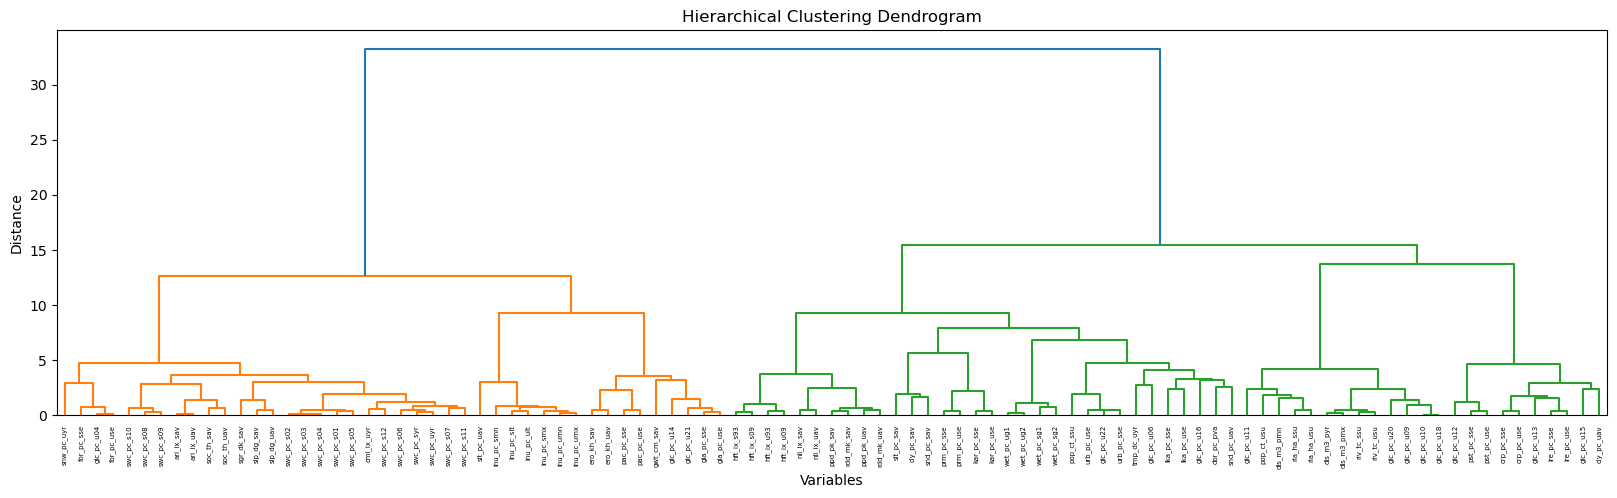

In [37]:
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Normalize the columns
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns, index= df_cleaned.index)

# Compute the distance matrix for the columns
distance_matrix = df_normalized.corr().values

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 5))
dendrogram(linkage_matrix, labels=df_normalized.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()


# 4,12,13,14

In [24]:
# Choose a value for k
k = 15

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, k, criterion='maxclust')

# Create a dictionary to store the representatives
cluster_representatives = {}

# Find a representative for each cluster
for cluster_id in set(cluster_labels):
    representative = df_normalized.columns[cluster_labels == cluster_id][0]
    cluster_representatives[cluster_id] = representative

print("Cluster Representatives:")
for cluster_id, representative in cluster_representatives.items():
    print(f"Cluster {cluster_id}: {representative}")

Cluster Representatives:
Cluster 1: snw_pc_uyr
Cluster 2: slp_dg_sav
Cluster 3: inu_pc_smn
Cluster 4: glc_pc_u14
Cluster 5: ppd_pk_sav
Cluster 6: cly_pc_sav
Cluster 7: prm_pc_sse
Cluster 8: wet_pc_sg1
Cluster 9: glc_pc_u22
Cluster 10: tmp_dc_uyr
Cluster 11: lka_pc_sse
Cluster 12: glc_pc_u11
Cluster 13: glc_pc_u09
Cluster 14: glc_pc_u12
Cluster 15: glc_pc_u13


In [25]:
from sklearn.cluster import KMeans

df_normalized_T = df_normalized.T

# Choose a value for k
k = 15

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_normalized_T)

# Get cluster labels
cluster_labels = kmeans.labels_

# Create a dictionary to store the representatives
cluster_representatives = {}

# Find a representative for each cluster
for cluster_id in set(cluster_labels):
    representative = df_normalized_T.index[cluster_labels == cluster_id][0]
    cluster_representatives[cluster_id] = representative

print("Cluster Representatives:")
for cluster_id, representative in cluster_representatives.items():
    print(f"Cluster {cluster_id}: {representative}")

Cluster Representatives:
Cluster 0: nli_ix_sav
Cluster 1: glc_pc_u04
Cluster 2: tmp_dc_uyr
Cluster 3: glc_pc_u13
Cluster 4: inu_pc_smn
Cluster 5: glc_pc_u09
Cluster 6: glc_pc_u14
Cluster 7: wet_pc_sg1
Cluster 8: slp_dg_sav
Cluster 9: dor_pc_pva
Cluster 10: lka_pc_sse
Cluster 11: snw_pc_uyr
Cluster 12: cmi_ix_uyr
Cluster 13: glc_pc_u12
Cluster 14: prm_pc_sse


In [40]:
cluster_representatives = [
    "glc_pc_u04",
    "tmp_dc_uyr",
    "glc_pc_u13",
    "inu_pc_ult",
    "glc_pc_u14",
    "wet_pc_ug1",
    "slp_dg_sav",
    "dor_pc_pva",
    "lka_pc_sse",
    "snw_pc_uyr",
    "cmi_ix_uyr",
    "glc_pc_u12",
    "prm_pc_sse"
]

new_static_variables = df_normalized[cluster_representatives]
# file_path = '/data/Hydra_Work/Scaled_Data/clustering_static_variables.pkl'
# new_static_variables.to_pickle(file_path)


In [39]:
new_static_variables

,glc_pc_u04,tmp_dc_uyr,glc_pc_u13,inu_pc_ult,glc_pc_u14,wet_pc_ug1,slp_dg_sav,dor_pc_pva,lka_pc_sse,snw_pc_uyr,cmi_ix_uyr,glc_pc_u12,prm_pc_sse
site_id,,,,,,,,,,,,,
american_river_folsom_lake,0.764980,0.574309,0.093763,0.062877,0.076220,1.000000,0.449085,0.423247,0.434653,0.647684,0.411629,0.201062,0.041416
animas_r_at_durango,0.900481,0.130138,0.371425,0.006572,0.007391,0.032686,0.642295,0.037143,0.048965,0.840007,0.534724,0.000000,0.366922
boise_r_nr_boise,0.669110,0.374517,0.130086,0.026824,0.001534,0.065901,0.531933,0.267778,0.260639,0.679174,0.219500,0.323795,0.001137
boysen_reservoir_inflow,0.277494,0.432047,0.469235,0.035070,0.079488,0.347118,0.084545,0.075040,0.886321,0.326490,0.105203,0.615958,0.135446
colville_r_at_kettle_falls,0.725776,0.772742,0.105334,0.018675,0.000000,0.046228,0.264996,0.000000,0.142574,0.441588,0.233405,0.156534,0.000000
detroit_lake_inflow,0.982211,0.679274,0.000000,0.030120,0.055894,0.385233,0.503153,0.000000,0.693069,0.543478,0.950005,0.001439,0.000000
dillon_reservoir_inflow,0.925560,0.015995,0.191516,0.024096,0.089431,0.041091,0.509719,0.000000,0.494257,0.997353,0.468198,0.011510,1.000000
fontenelle_reservoir_inflow,0.565632,0.128007,0.766065,0.012197,0.019071,0.617007,0.098156,0.095626,0.265982,0.756424,0.168345,0.282488,0.130150
green_r_bl_howard_a_hanson_dam,0.980843,0.681773,0.000000,1.000000,0.000000,0.012841,0.599562,0.065139,0.150495,0.569943,1.000000,0.000000,0.000000


In [28]:
columns_with_aet = [col for col in Hydro_basins.columns if 'glc_pc_u' in col]
# Show these columns
df_with_aet = Hydro_basins[columns_with_aet]

df_with_aet.mean()

# pop_ct_usu
# df_with_aet

glc_pc_u01     0.000000
glc_pc_u02     0.000000
glc_pc_u03     0.000000
glc_pc_u04    77.010458
glc_pc_u05     0.000000
glc_pc_u06     0.314504
glc_pc_u07     0.000000
glc_pc_u08     0.000000
glc_pc_u09     0.132552
glc_pc_u10     0.020842
glc_pc_u11     0.137459
glc_pc_u12    14.991520
glc_pc_u13     3.737181
glc_pc_u14     2.257570
glc_pc_u15     0.043067
glc_pc_u16     0.781134
glc_pc_u17     0.000000
glc_pc_u18     0.003223
glc_pc_u19     0.000000
glc_pc_u20     0.282781
glc_pc_u21     0.254061
glc_pc_u22     0.011175
dtype: float64

In [26]:
# Choosing a subset of static variables

# Annual Evapotranspiration. aet_mm_00 (01-12 are months, maybe variability is good but that's it)
# Majority land cover class  glc_cl_{xoo}, only use upstream (u), and take the top 5 classes


# Choosing Land cover classes to keep
columns_with_glc = [col for col in static_variables.columns if 'glc_pc_u' in col]
# Show these columns
df_with_glc = static_variables[columns_with_glc]
sums = df_with_glc.sum()
top_5_columns = sums.nlargest(5).index.tolist()
top_5_columns

columns_to_keep = [col for col in static_variables.columns if 'glc' not in col or col in top_5_columns]
# Filter the DataFrame to keep only these columns
static_variables = static_variables[columns_to_keep]

# Aet, Swc, Pet yearly only
columns_to_keep = [col for col in static_variables.columns if 'aet' not in col or col in ['aet_mm_uyr']]
static_variables = static_variables[columns_to_keep]
columns_to_keep = [col for col in static_variables.columns if 'swc' not in col or col in ['swc_pc_uyr']]
static_variables = static_variables[columns_to_keep]
columns_to_keep = [col for col in static_variables.columns if 'pet' not in col or col in ['pet_mm_uyr']]
static_variables = static_variables[columns_to_keep]
columns_to_keep = [col for col in static_variables.columns if 'inu' not in col or col in ['pet_mm_uyr']]
static_variables = static_variables[columns_to_keep]
columns_to_keep = [col for col in static_variables.columns if 'wet' not in col or col in ['wet_pc_ug1, wet_pc_ug2']]
static_variables = static_variables[columns_to_keep]
columns_to_keep = [col for col in static_variables.columns if 'hft' not in col or col in ['hft_ix_u09']]
static_variables = static_variables[columns_to_keep]
columns_to_keep = [col for col in static_variables.columns if 'hft' not in col or col in ['rev_mc_usu', 'lkv_mc_usu', 'ari_ix_uav', 'riv_tc_usu', 'riv_tc_usu', 'sgr_dk_sav', 	'snw_pc_uyr', 'cmi_ix_uyr', 'slt_pc_uav', 'cly_pc_uav']]
static_variables = static_variables[columns_to_keep]





In [28]:
first_3_chars = [col[:3] for col in static_variables.columns]

# Create a Series and count frequencies
freq_table = pd.Series(first_3_chars).value_counts()
freq_table

glc    5
dis    3
lka    2
cly    2
pop    2
riv    2
ria    2
rdd    2
nli    2
urb    2
ero    2
kar    2
soc    2
snd    2
slt    2
ppd    2
pac    2
gla    2
ire    2
slp    2
pst    2
crp    2
prm    2
for    2
ari    2
cls    1
clz    1
tec    1
pnv    1
tbi    1
pre    1
fmh    1
fec    1
pet    1
lkv    1
sgr    1
tmp    1
rev    1
run    1
gwt    1
hft    1
cmi    1
snw    1
dor    1
swc    1
lit    1
dtype: int64

In [27]:
static_variables

,lka_pc_sse,lka_pc_use,dor_pc_pva,slp_dg_sav,slp_dg_uav,sgr_dk_sav,tmp_dc_uyr,ari_ix_sav,ari_ix_uav,cmi_ix_uyr,...,pop_ct_ssu,pop_ct_usu,clz_cl_smj,cls_cl_smj,pnv_cl_smj,tbi_cl_smj,tec_cl_smj,fmh_cl_smj,fec_cl_smj,lit_cl_smj
site_id,,,,,,,,,,,,,,,,,,,,,
american_river_folsom_lake,0.434653,0.713885,0.423247,0.449085,0.468368,0.649741,0.574309,0.179421,0.210779,0.411629,...,0.050422,0.028196,0.333333,0.134615,0.000,0.000,0.162791,0.333333,0.536585,0.666667
animas_r_at_durango,0.048965,0.049112,0.037143,0.642295,0.666616,0.634465,0.130138,0.249339,0.290433,0.534724,...,0.096591,0.025010,0.166667,0.326923,0.125,0.000,0.011628,0.000000,0.658537,0.166667
boise_r_nr_boise,0.260639,0.136880,0.267778,0.531933,0.535692,0.334488,0.374517,0.103998,0.110686,0.219500,...,0.050581,0.017888,0.500000,0.326923,0.000,0.000,0.174419,1.000000,0.439024,0.666667
boysen_reservoir_inflow,0.886321,0.418819,0.075040,0.084545,0.169211,0.189147,0.432047,0.023204,0.053778,0.105203,...,0.187595,0.427655,0.500000,0.653846,1.000,1.000,1.000000,0.666667,0.951220,0.166667
colville_r_at_kettle_falls,0.142574,0.690732,0.000000,0.264996,0.263335,0.216274,0.772742,0.114804,0.117807,0.233405,...,0.102683,0.071517,0.500000,0.653846,0.000,0.000,0.104651,0.666667,0.414634,0.000000
detroit_lake_inflow,0.693069,0.414825,0.000000,0.503153,0.434708,0.702672,0.679274,0.816238,0.802724,0.950005,...,0.002073,0.000846,0.000000,0.230769,0.000,0.000,0.000000,1.000000,0.439024,0.083333
dillon_reservoir_inflow,0.494257,0.756332,0.000000,0.509719,0.495684,0.376357,0.015995,0.235773,0.246340,0.468198,...,0.082755,0.022241,0.166667,0.000000,0.250,0.000,0.011628,0.000000,0.658537,0.666667
fontenelle_reservoir_inflow,0.265982,0.653621,0.095626,0.098156,0.189809,0.161254,0.128007,0.052292,0.085769,0.168345,...,0.050665,0.121617,0.333333,0.326923,0.250,1.000,1.000000,0.000000,0.658537,0.000000
green_r_bl_howard_a_hanson_dam,0.150495,0.096471,0.065139,0.599562,0.614747,0.572746,0.681773,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.230769,0.000,0.000,0.000000,0.333333,0.000000,0.083333


In [3]:
import os
import pickle 
import joblib
import pandas as pd
import numpy as np
import random
import itertools
from datetime import datetime, timedelta
# import matplotlib.dates as mdates

# import matplotlib.pyplot as plt
# plt.style.use('tableau-colorblind10')

import sys
sys.path.append('/data/Hydra_Work/Competition_Functions') 
from Data_Transforming import read_nested_csvs, generate_daily_flow, use_USGS_flow_data, USGS_to_daily_df_yearly


sys.path.append('/data/Hydra_Work/Pipeline_Functions')
from Folder_Work import filter_rows_by_year, csv_dictionary, add_day_of_year_column


from datetime import datetime
# All the prep

basins = ['libby_reservoir_inflow',  'owyhee_r_bl_owyhee_dam',  'san_joaquin_river_millerton_reservoir',  'taylor_park_reservoir_inflow',
 'boise_r_nr_boise', 'green_r_bl_howard_a_hanson_dam', 'weber_r_nr_oakley', 'detroit_lake_inflow', 'virgin_r_at_virtin', 'dillon_reservoir_inflow',
 'pueblo_reservoir_inflow', 'hungry_horse_reservoir_inflow', 'stehekin_r_at_stehekin', 'pecos_r_nr_pecos', 'snake_r_nr_heise', 'yampa_r_nr_maybell',
 'colville_r_at_kettle_falls', 'missouri_r_at_toston', 'merced_river_yosemite_at_pohono_bridge', 'animas_r_at_durango','fontenelle_reservoir_inflow', 'boysen_reservoir_inflow']

selected_years = range(2000,2024,2)

era5_folder = '/data/Hydra_Work/Rodeo_Data/era5'
era5 = csv_dictionary(era5_folder, basins, years=selected_years)
era5 = add_day_of_year_column(era5)

flow_folder = '/data/Hydra_Work/Rodeo_Data/train_monthly_naturalized_flow'
flow = csv_dictionary(flow_folder, basins)
flow = filter_rows_by_year(flow, 1998)

root_folder = '/data/Hydra_Work/Rodeo_Data/seasonal_forecasts'
seasonal_forecasts = read_nested_csvs(root_folder)

USGS_flow_folder = '/data/Hydra_Work/Rodeo_Data/USGS_streamflows'
USGS_flow = csv_dictionary(USGS_flow_folder, basins)

Static_variables = pd.read_csv('/data/Hydra_Work/Rodeo_Data/static_indices.csv', index_col= 'site_id')

# Convert monthly flow values to daily flow estimates
daily_flow = {}

# Iterate through the dictionary and apply generate_daily_flow to each DataFrame
for key, df in flow.items():
    daily_flow[key] = generate_daily_flow(df, persistence_factor=0.7)

# Replacing monhtly data for normalised USGS when available
daily_flow = use_USGS_flow_data(daily_flow, USGS_flow)

# Introducing the data from San_jaoqin and Merced, normalised by the yearly flow given
path = '/data/Hydra_Work/Rodeo_Data/USGS_streamflows/san_joaquin_river_millerton_reservoir.csv'
name = 'san_joaquin_river_millerton_reservoir'
normalising_path = '/data/Hydra_Work/Rodeo_Data/train_yearly/san_joaquin_river_millerton_reservoir.csv'

USGS_to_daily_df_yearly(daily_flow, path, name, normalising_path)

path = '/data/Hydra_Work/Rodeo_Data/USGS_streamflows/merced_river_yosemite_at_pohono_bridge.csv'
name = 'merced_river_yosemite_at_pohono_bridge'
normalising_path = '/data/Hydra_Work/Rodeo_Data/train_yearly/merced_river_yosemite_at_pohono_bridge.csv'

USGS_to_daily_df_yearly(daily_flow, path, name, normalising_path)

path = '/data/Hydra_Work/Rodeo_Data/USGS_streamflows/detroit_lake_inflow.csv'
name = 'detroit_lake_inflow'
normalising_path = '/data/Hydra_Work/Rodeo_Data/train_yearly/detroit_lake_inflow.csv'

USGS_to_daily_df_yearly(daily_flow, path, name, normalising_path)

In [6]:
flow['animas_r_at_durango']['volume']

,site_id,forecast_year,year,month,volume
903,animas_r_at_durango,1998,1998,1,14.420
904,animas_r_at_durango,1998,1998,2,11.804
905,animas_r_at_durango,1998,1998,3,22.304
906,animas_r_at_durango,1998,1998,4,39.727
907,animas_r_at_durango,1998,1998,5,138.664
...,...,...,...,...,...
1039,animas_r_at_durango,2022,2022,2,7.319
1040,animas_r_at_durango,2022,2022,3,11.599
1041,animas_r_at_durango,2022,2022,4,34.155
1042,animas_r_at_durango,2022,2022,5,111.848


In [ ]:
basin_means = {}

# Iterate over each key in the dictionary
for key, df in era5.items():
    # Extract the basin name from the key
    basin, year = key.rsplit('_', 1)
    
    # Calculate the mean of the DataFrame
    df_mean = df.mean()
    
    # If the basin is already in the dictionary, add the mean to the existing list
    if basin in basin_means:
        basin_means[basin].append(df_mean)
    else:
        # If the basin is not in the dictionary, create a new entry with the mean
        basin_means[basin] = [df_mean]

# Initialize a list to store the final mean values for each basin
final_means = []

# Iterate over each basin in the dictionary
for basin, means in basin_means.items():
    # Concatenate the list of means into a single DataFrame
    df_means = pd.concat(means, axis=1).transpose()
    
    # Calculate the mean of means (i.e., mean across years for each variable)
    mean_of_means = df_means.mean()
    
    # Add the basin name to the mean_of_means Series
    mean_of_means.name = basin
    
    # Append to the final means list
    final_means.append(mean_of_means)

# Concatenate the list of means into a final DataFrame
final_df = pd.DataFrame(final_means)


min_means = final_df.min()
median_means = final_df.median()
max_means = final_df.max()

# Create a new DataFrame with these statistics
stats_df = pd.DataFrame({
    'minimum of catchment means': min_means,
    'median of catchment means': median_means,
    'maximum of catchment means': max_means
})

# Transpose the DataFrame so that rows are variables and columns are the statistics
stats_df = stats_df
stats_df

In [10]:
mean_flows = {}

# Iterate over each basin in the daily_flow dictionary
for basin in daily_flow.keys():
    # Calculate the mean flow for the current basin
    mean_flow = daily_flow[basin].mean()
    
    # Store the mean flow in the dictionary
    mean_flows[basin] = mean_flow

# Convert the dictionary to a DataFrame
mean_flows_df = pd.DataFrame.from_dict(mean_flows, orient='index')


min_means = mean_flows_df.min()
median_means = mean_flows_df.median()
max_means = mean_flows_df.max()

# Create a new DataFrame with these statistics
stats_df = pd.DataFrame({
    'minimum of catchment means': min_means,
    'median of catchment means': median_means,
    'maximum of catchment means': max_means
})

# Transpose the DataFrame so that rows are variables and columns are the statistics
stats_df = stats_df
stats_df

,minimum of catchment means,median of catchment means,maximum of catchment means
0,4.869113,78.5025,649.02756


In [ ]:
min_means = Static_variables.min()
median_means = Static_variables.median()
max_means = Static_variables.max()

# Create a new DataFrame with these statistics
stats_df = pd.DataFrame({
    'minimum of catchment means': min_means,
    'median of catchment means': median_means,
    'maximum of catchment means': max_means
})

stats_df